### Implementation and studies of Gabor Filters

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### The Gabor filter can be described by the following equation:

$
    g(x, y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x'^2  +  \gamma^2 y'^2}{2\sigma^2}\right) \cos\left(2\pi \frac{x'}{\lambda} + \psi\right)
$

where:

$x' = x \cos(\theta) + y \sin(\theta)$

$y' = -x \sin(\theta) + y \cos(\theta)$

Parameters:

$\lambda$: Wavelength of the sinusoidal factor. 

$\theta$: Orientation of the normal to the parallel stripes.

$\psi$: Phase offset.

$\sigma$: Standard deviation of the Gaussian envelope.

$\gamma$: Spatial aspect ratio, which specifies the ellipticity of the filter.


In [3]:
# lambda is a keyword in python so we use Lambda
def gabor(sigma, theta, Lambda, psi, gamma):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    nstds = 3
    xmax = max(
        abs(nstds * sigma_x * np.cos(theta)), 
        abs(nstds * sigma_y * np.sin(theta))
    )
    xmax = np.ceil(max(1, xmax))
    
    ymax = max(
        abs(nstds * sigma_x * np.sin(theta)),
        abs(nstds * sigma_y * np.cos(theta))
    )
    ymax = np.ceil(max(1, ymax))

    xmin = -xmax
    ymin = -ymax
    (x, y) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb
    

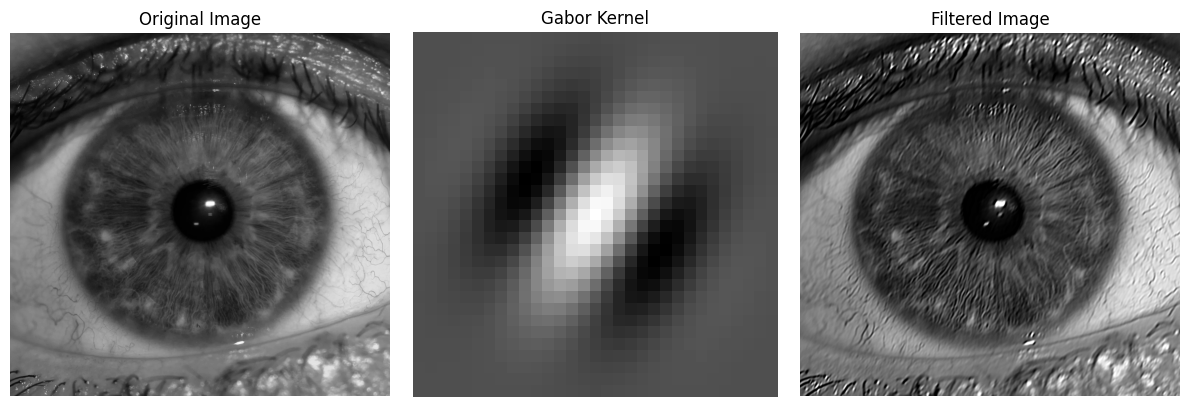

In [38]:
image = cv2.imread('human-iris.jpg', cv2.IMREAD_GRAYSCALE)

sigma = 5.5
theta = np.pi / 6
Lambda = 15.0
psi = 0
gamma = 1.0
gabor_kernel = gabor(sigma, theta, Lambda, psi, gamma)

def apply_gabor_filter(image, kernel):
    kernel = kernel / np.sum(kernel)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

filtered_image = apply_gabor_filter(image, gabor_kernel)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gabor Kernel')
plt.imshow(gabor_kernel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()